Location            1002        1005                    1006
Year                2022        2021        2022        2021
Hourly Index                                                
0             159.370241  111.786717  147.978074  242.800802
1             130.900767  107.032997  131.739401  235.256995
2             118.064645   99.963730  117.559937  213.463914


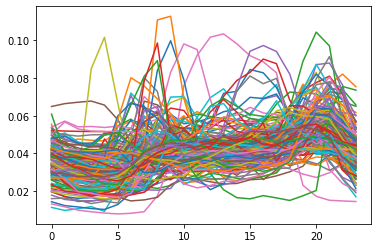

[[0.0294522  0.02419094 0.02181878 ... 0.05424849 0.04724431 0.03811178]
 [0.03697021 0.03539806 0.0330601  ... 0.04923772 0.04641816 0.04077836]
 [0.02819255 0.02509879 0.02239734 ... 0.04587297 0.0377987  0.03169705]
 ...
 [0.04018237 0.03514527 0.03211338 ... 0.05102199 0.04638265 0.04398417]
 [0.02981397 0.03112039 0.03133419 ... 0.0445977  0.03743993 0.03334566]
 [0.0297555  0.02917689 0.02756522 ... 0.04828347 0.03783256 0.03282472]]


In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

from Navajo_Load_Profiles_Functions import *


folders = create_folders()

avg_load_profiles_df = pd.read_csv(f"{folders['Aggregated Load Profiles']}\\Average Load Profiles.csv",
                                   index_col=[0], header=[0, 1])
hourly_load_profiles_df = calc_hourly_df(avg_load_profiles_df)
hourly_load_profiles_df = shift_hourly(hourly_load_profiles_df, -6)
hourly_load_profiles_df = hourly_load_profiles_df.dropna(axis=1, how='all')
print(hourly_load_profiles_df.iloc[:3, :4])

X = hourly_load_profiles_df.loc[:, hourly_load_profiles_df.columns].values
X = X.T
X_norm = sklearn.preprocessing.normalize(X, norm='l1', axis=1)
plt.plot(X_norm.T)
plt.show()
print(X_norm)

Agglomerative (heirarchical):

Num vals in 0: 16


C:\Users\soshe\AppData\Local\Temp/ipykernel_644/3236213220.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
C:\Users\soshe\AppData\Local\Temp/ipykernel_644/3236213220.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')


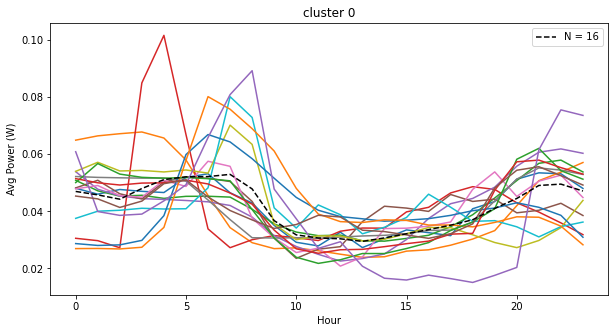

Num vals in 1: 36


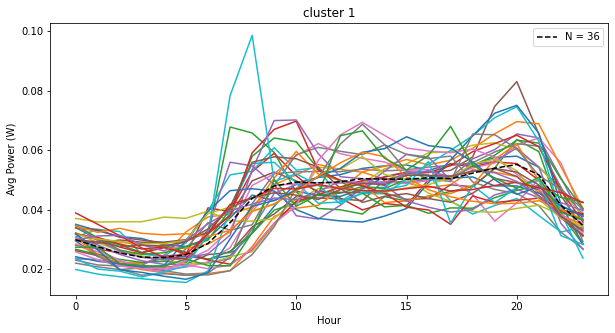

Num vals in 2: 50


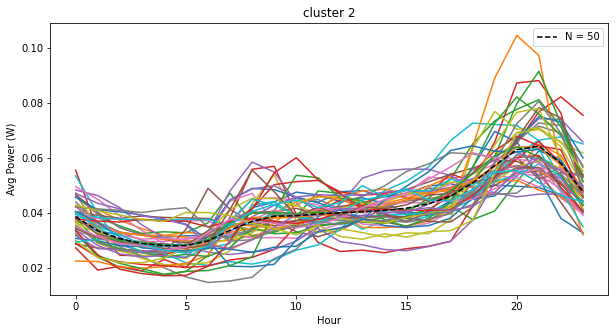

Num vals in 3: 9


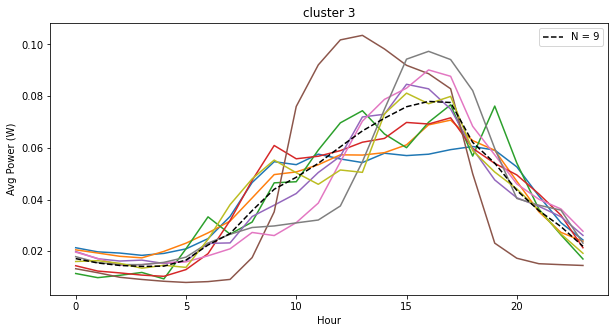

Num vals in 4: 62


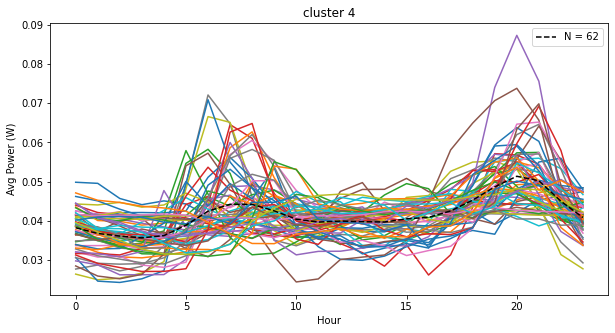

Num vals in 5: 3


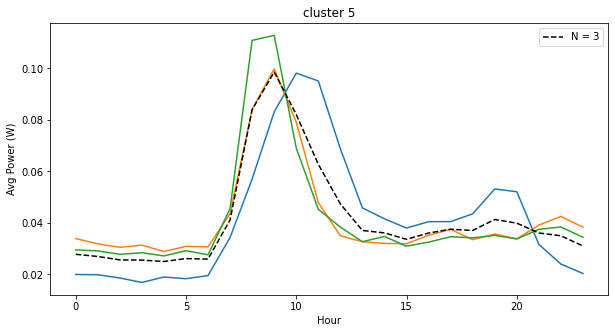

In [22]:
# Plot all lines in each cluster with cluster centers
n_clusters = 6
# km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
km = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
y_km = km.fit_predict(X_norm)

silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
silsample_scores = metrics.silhouette_samples(X_norm, km.labels_)

for cluster_num in range(n_clusters):
    # silsample_score[cluster_num] = metrics.silhouette_samples(X_norm[km.labels_ == cluster_num], km.labels_[km.labels_ == cluster_num])
    silscore_by_cluster[cluster_num] = np.mean(silsample_scores[km.labels_ == cluster_num])

    plt.figure(figsize=(10,5))
    print(f"Num vals in {cluster_num}: {sum(km.labels_ == cluster_num)}")
    plt.plot(X_norm[km.labels_ == cluster_num].T)

    # plt.plot(km.cluster_centers_[cluster_num], linestyle='--', color='k', label=f"N = {sum(km.labels_ == cluster_num)}")
    plt.plot(X_norm[km.labels_ == cluster_num].mean(axis=0), linestyle='--', color='k', label=f"N = {sum(km.labels_ == cluster_num)}")

    plt.title(f"cluster {cluster_num}")
    plt.legend()
    plt.ylabel("Avg Power (W)")
    plt.xlabel("Hour")
    # plt.ax
    plt.show()

Agglomerative (heirarchical):

C:\Users\soshe\AppData\Local\Temp/ipykernel_644/2350128024.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
C:\Users\soshe\AppData\Local\Temp/ipykernel_644/2350128024.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')


Num vals in 0: 16
Num vals in 1: 36
Num vals in 2: 50
Num vals in 3: 9
Num vals in 4: 62
Num vals in 5: 3


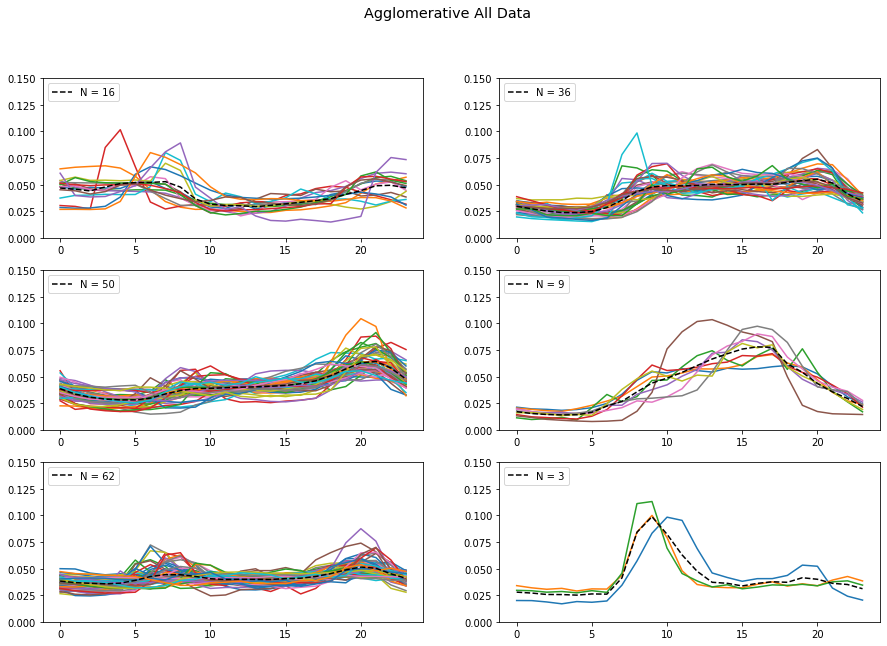

0    0.023245
1    0.095027
2    0.058587
3    0.202143
4    0.315817
5    0.252743
Name: Cluster #, dtype: float64


<BarContainer object of 6 artists>

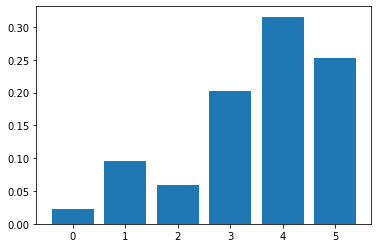

In [23]:
# Plot all lines in each cluster with cluster centers
n_clusters = 6
# km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
km = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
y_km = km.fit_predict(X_norm)

silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
silsample_scores = metrics.silhouette_samples(X_norm, km.labels_)

fig, ax = plt.subplots(3, 2)
for cluster_num in range(n_clusters):
    # silsample_score[cluster_num] = metrics.silhouette_samples(X_norm[km.labels_ == cluster_num], km.labels_[km.labels_ == cluster_num])
    silscore_by_cluster[cluster_num] = np.mean(silsample_scores[km.labels_ == cluster_num])

    # plt.figure(figsize=(10,5))
    print(f"Num vals in {cluster_num}: {sum(km.labels_ == cluster_num)}")
    ax[cluster_num // 2, cluster_num % 2].plot(X_norm[km.labels_ == cluster_num].T)

    # plt.plot(km.cluster_centers_[cluster_num], linestyle='--', color='k', label=f"N = {sum(km.labels_ == cluster_num)}")
    ax[cluster_num // 2, cluster_num % 2].plot(
        X_norm[km.labels_ == cluster_num].mean(axis=0),
        linestyle='--', color='k',
        label=f"N = {sum(km.labels_ == cluster_num)}")

    # plt.title(f"cluster {cluster_num}")
    ax[cluster_num // 2, cluster_num % 2].legend(loc='upper left')
    ax[cluster_num // 2, cluster_num % 2].set_ylim([0, .15])
    # plt.ylabel("Avg Power (W)")
    # plt.xlabel("Hour")
    # plt.ax
fig.set_size_inches(15,10)
fig.suptitle('Agglomerative All Data', fontsize='x-large')
plt.show()

print(silscore_by_cluster)
plt.bar(silscore_by_cluster.index, silscore_by_cluster.values)

K-Means:

C:\Users\soshe\AppData\Local\Temp/ipykernel_644/3496049593.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
C:\Users\soshe\AppData\Local\Temp/ipykernel_644/3496049593.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')


Num vals in 0: 13
Num vals in 1: 41
Num vals in 2: 22
Num vals in 3: 22
Num vals in 4: 64
Num vals in 5: 14


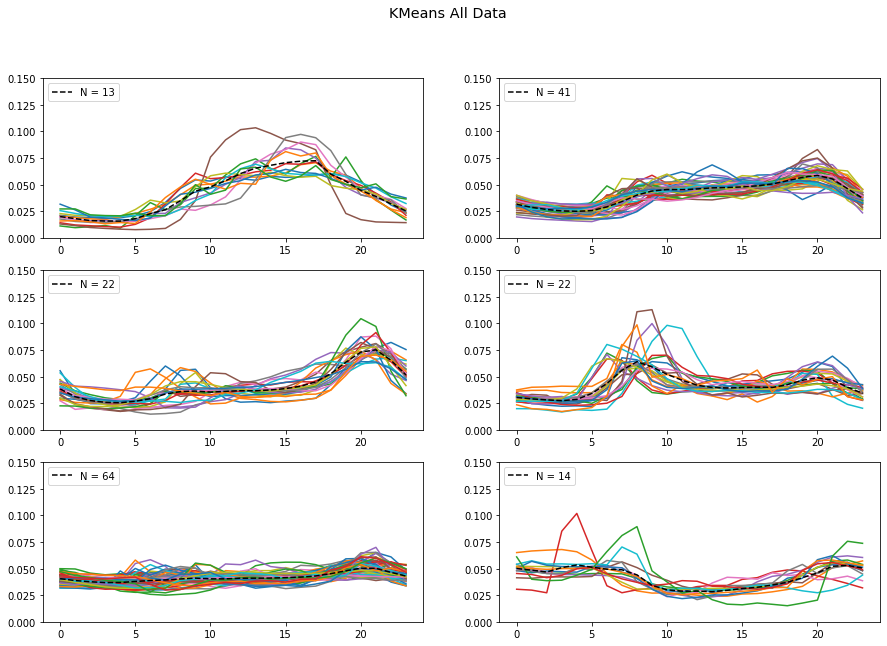

0    0.173607
1    0.177408
2    0.091807
3   -0.028456
4    0.363288
5    0.126507
Name: Cluster #, dtype: float64


<BarContainer object of 6 artists>

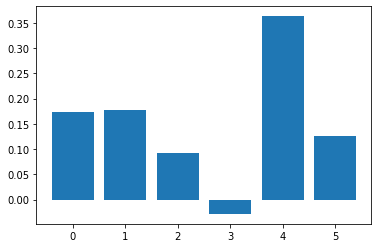

In [24]:
# Plot all lines in each cluster with cluster centers
n_clusters = 6
km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
y_km = km.fit_predict(X_norm)

silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
silsample_scores = metrics.silhouette_samples(X_norm, km.labels_)

fig, ax = plt.subplots(3, 2)
for cluster_num in range(n_clusters):
    # silsample_score[cluster_num] = metrics.silhouette_samples(X_norm[km.labels_ == cluster_num], km.labels_[km.labels_ == cluster_num])
    silscore_by_cluster[cluster_num] = np.mean(silsample_scores[km.labels_ == cluster_num])

    # plt.figure(figsize=(10,5))
    print(f"Num vals in {cluster_num}: {sum(km.labels_ == cluster_num)}")
    ax[cluster_num // 2, cluster_num % 2].plot(X_norm[km.labels_ == cluster_num].T)

    ax[cluster_num // 2, cluster_num % 2].plot(km.cluster_centers_[cluster_num], linestyle='--', color='k', label=f"N = {sum(km.labels_ == cluster_num)}")
    # ax[cluster_num // 2, cluster_num % 2].plot(X_norm[km.labels_ == cluster_num].mean(axis=0), linestyle='--', color='k', label=f"N = {sum(km.labels_ == cluster_num)}")

    # plt.title(f"cluster {cluster_num}")
    ax[cluster_num // 2, cluster_num % 2].legend(loc='upper left')
    ax[cluster_num // 2, cluster_num % 2].set_ylim([0, .15])

fig.set_size_inches(15,10)
fig.suptitle('KMeans All Data', fontsize='x-large')
plt.show()

print(silscore_by_cluster)
plt.bar(silscore_by_cluster.index, silscore_by_cluster.values)

0    0.173607
1    0.177408
2    0.091807
3   -0.028456
4    0.363288
5    0.126507
Name: Cluster #, dtype: float64


<BarContainer object of 6 artists>

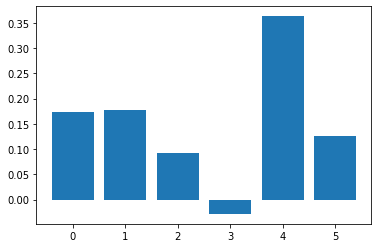

In [25]:
print(silscore_by_cluster)
plt.bar(silscore_by_cluster.index, silscore_by_cluster.values)

K-Means:

Num vals in 0: 78
Num vals in 1: 82
Num vals in 2: 16


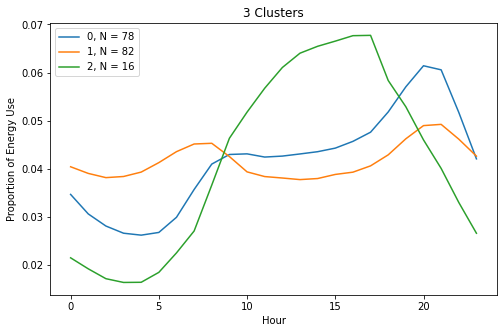

Num vals in 0: 39
Num vals in 1: 78
Num vals in 2: 45
Num vals in 3: 14


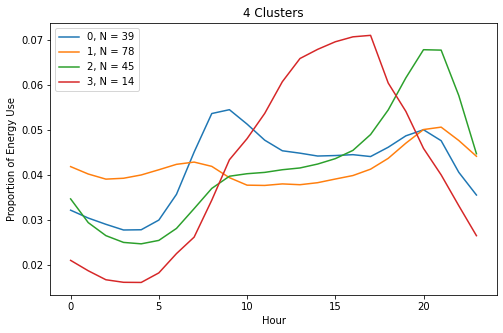

Num vals in 0: 21
Num vals in 1: 18
Num vals in 2: 17
Num vals in 3: 82
Num vals in 4: 38


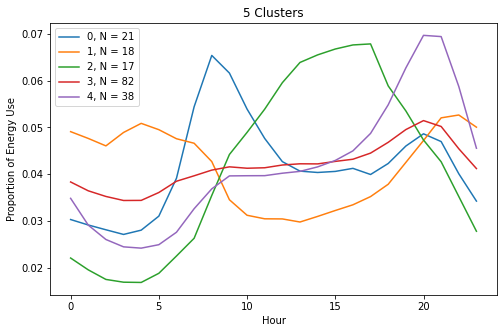

Num vals in 0: 13
Num vals in 1: 41
Num vals in 2: 22
Num vals in 3: 22
Num vals in 4: 64
Num vals in 5: 14


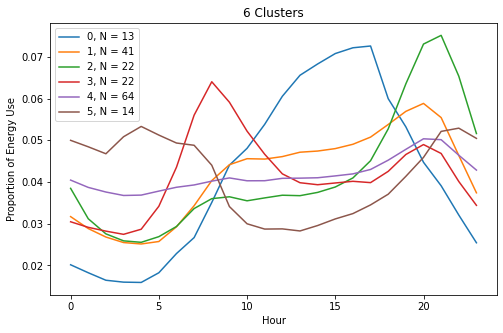

Num vals in 0: 62
Num vals in 1: 15
Num vals in 2: 20
Num vals in 3: 36
Num vals in 4: 21
Num vals in 5: 9
Num vals in 6: 13


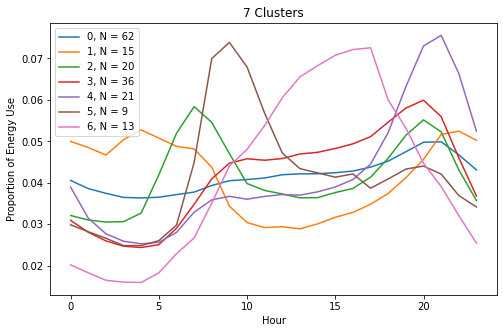

Num vals in 0: 19
Num vals in 1: 13
Num vals in 2: 14
Num vals in 3: 58
Num vals in 4: 23
Num vals in 5: 8
Num vals in 6: 28
Num vals in 7: 13


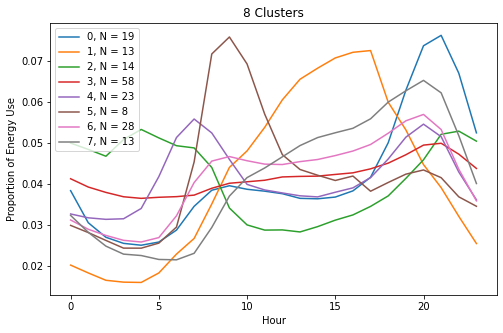

Num vals in 0: 14
Num vals in 1: 9
Num vals in 2: 13
Num vals in 3: 1
Num vals in 4: 20
Num vals in 5: 40
Num vals in 6: 24
Num vals in 7: 22
Num vals in 8: 33


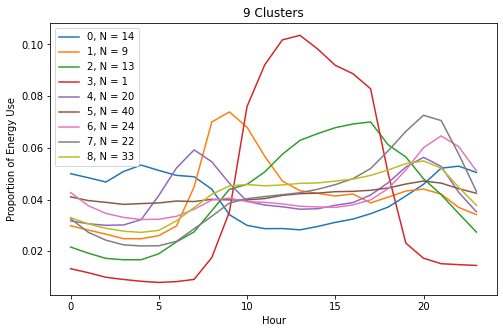

Num vals in 0: 14
Num vals in 1: 8
Num vals in 2: 16
Num vals in 3: 1
Num vals in 4: 19
Num vals in 5: 38
Num vals in 6: 23
Num vals in 7: 16
Num vals in 8: 29
Num vals in 9: 12


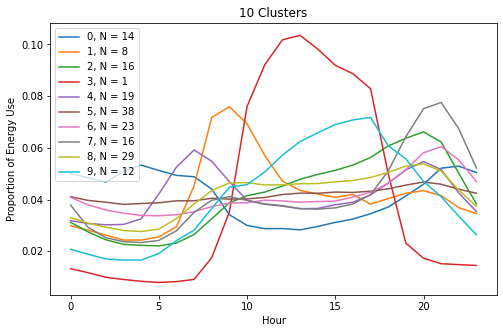

Num vals in 0: 17
Num vals in 1: 1
Num vals in 2: 6
Num vals in 3: 18
Num vals in 4: 9
Num vals in 5: 2
Num vals in 6: 31
Num vals in 7: 51
Num vals in 8: 13
Num vals in 9: 15
Num vals in 10: 13


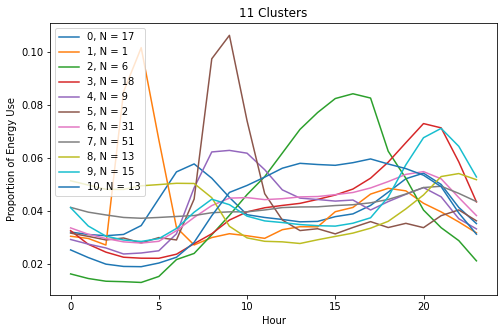

Num vals in 0: 1
Num vals in 1: 1
Num vals in 2: 13
Num vals in 3: 14
Num vals in 4: 4
Num vals in 5: 41
Num vals in 6: 12
Num vals in 7: 9
Num vals in 8: 21
Num vals in 9: 21
Num vals in 10: 4
Num vals in 11: 35


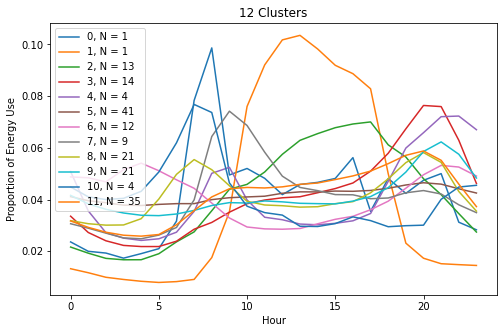

Num vals in 0: 5
Num vals in 1: 20
Num vals in 2: 12
Num vals in 3: 33
Num vals in 4: 3
Num vals in 5: 9
Num vals in 6: 18
Num vals in 7: 1
Num vals in 8: 20
Num vals in 9: 7
Num vals in 10: 8
Num vals in 11: 31
Num vals in 12: 9


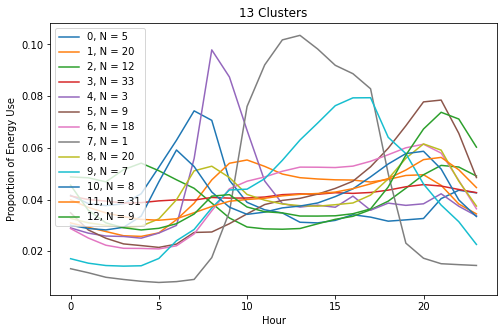

Num vals in 0: 5
Num vals in 1: 13
Num vals in 2: 12
Num vals in 3: 41
Num vals in 4: 3
Num vals in 5: 14
Num vals in 6: 14
Num vals in 7: 1
Num vals in 8: 13
Num vals in 9: 7
Num vals in 10: 6
Num vals in 11: 25
Num vals in 12: 3
Num vals in 13: 19


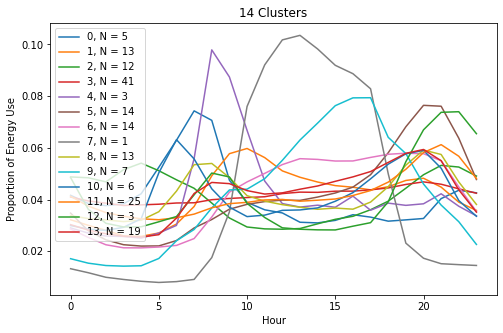

Num vals in 0: 4
Num vals in 1: 15
Num vals in 2: 1
Num vals in 3: 37
Num vals in 4: 4
Num vals in 5: 12
Num vals in 6: 14
Num vals in 7: 1
Num vals in 8: 4
Num vals in 9: 7
Num vals in 10: 6
Num vals in 11: 29
Num vals in 12: 10
Num vals in 13: 19
Num vals in 14: 13


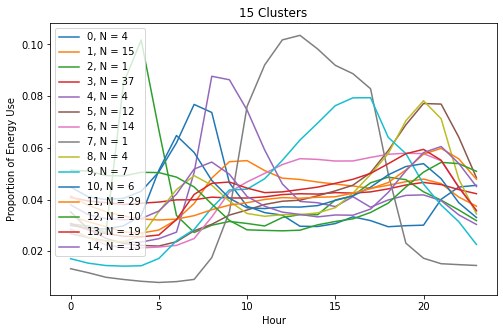

In [26]:
# Plot only the cluster centers
info_df = pd.DataFrame()
for n_clusters in range(3, 16):
    km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
    y_km = km.fit_predict(X_norm)

    info_df.loc[n_clusters, 'inertia'] = km.inertia_
    info_df.loc[n_clusters, 'logscore'] = np.log(-km.score(X_norm))
    info_df.loc[n_clusters, 'silscore'] = metrics.silhouette_score(X_norm, y_km)

    plt.figure(figsize=(8,5))
    for i in list(set(km.labels_)):
        print(f"Num vals in {i}: {sum(km.labels_ == i)}")
        plt.plot(
            km.cluster_centers_[i],
            label=f'{i}, N = {sum(km.labels_ == i)}'
        )

    plt.legend(scatterpoints=1)
    plt.title(f"{n_clusters} Clusters")
    plt.ylabel("Proportion of Energy Use")
    plt.xlabel("Hour")
    plt.legend(loc='upper left')
    plt.show()

     inertia  logscore  silscore
3   0.293764 -1.224979  0.200213
4   0.254844 -1.367104  0.209707
5   0.226082 -1.486859  0.233339
6   0.205791 -1.580896  0.204238
7   0.186406 -1.679826  0.216337
8   0.177192 -1.730524  0.200056
9   0.166231 -1.794378  0.174031
10  0.157321 -1.849466  0.164114
11  0.153084 -1.876766  0.186354
12  0.146157 -1.923071  0.186602
13  0.135102 -2.001724  0.184644
14  0.132060 -2.024498  0.189513
15  0.127635 -2.058584  0.184228


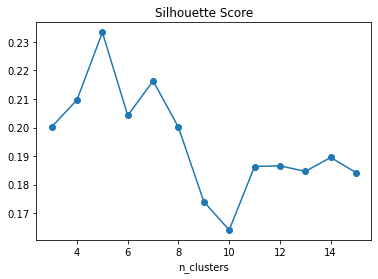

In [27]:
print(info_df)
# plt.plot(info_df.index, info_df['inertia'], marker='o')
# plt.title('inertia')
# plt.xlabel('n_clusters')
# plt.show()

# plt.plot(info_df.index, info_df['logscore'], marker='o')
# plt.title('log(-score)')
# plt.xlabel('n_clusters')
# plt.show()

plt.plot(info_df.index, info_df['silscore'], marker='o')
plt.title('Silhouette Score')
plt.xlabel('n_clusters')
plt.show()

     inertia  logscore  silscore
3   0.038920  0.142125 -0.009494
4   0.028762  0.119754 -0.023632
5   0.020291  0.094038  0.029101
6   0.019384  0.098930 -0.012099
7   0.009215  0.050698  0.016281
8   0.010961  0.063854  0.026025
9   0.008910  0.055087  0.009916
10  0.004237  0.027300 -0.022240
11  0.006927  0.046305 -0.000248
12  0.011055  0.078653  0.001958
13  0.003042  0.022774 -0.004869
14  0.004426  0.034086  0.005285
15       NaN       NaN       NaN


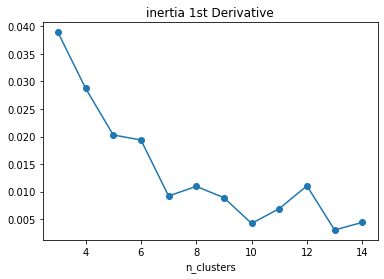

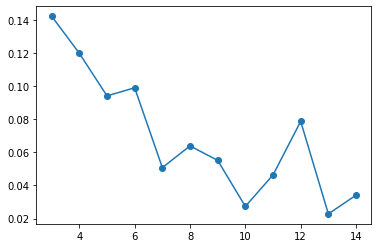

In [28]:
# info_diff_df = (info_df.diff(-2) + info_df.diff(-1)) / 2
info_diff_df = info_df.diff(-1)
print(info_diff_df)
plt.plot(info_diff_df.index, info_diff_df['inertia'], marker='o')
plt.title('inertia 1st Derivative')
plt.xlabel('n_clusters')
plt.show()
plt.plot(info_diff_df.index, info_diff_df['logscore'], marker='o')
plt.show()

     inertia  logscore  silscore
3   0.010158  0.022371  0.014139
4   0.008471  0.025717 -0.052734
5   0.000907 -0.004892  0.041200
6   0.010169  0.048232 -0.028380
7  -0.001746 -0.013157 -0.009744
8   0.002051  0.008767  0.016109
9   0.004673  0.027787  0.032156
10 -0.002690 -0.019005 -0.021992
11 -0.004128 -0.032348 -0.002206
12  0.008013  0.055879  0.006826
13 -0.001384 -0.011312 -0.010154
14       NaN       NaN       NaN
15       NaN       NaN       NaN


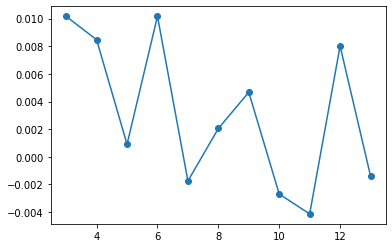

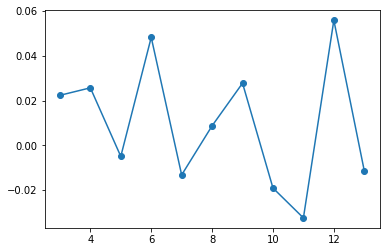

In [29]:
info_d2_df = info_df.diff(-1) - info_df.shift(-1).diff(-1)
print(info_d2_df)
plt.plot(info_d2_df.index, info_d2_df['inertia'], marker='o')
plt.show()
plt.plot(info_d2_df.index, info_d2_df['logscore'], marker='o')
plt.show()